In [0]:
# Denver coordinates = [39.742043, -104.991531]
# Tokyo coordinates = [35.6804, 139.7690]
# Beijing coordinates = [39.9042, 116.4074]

In [0]:
# Find the Distance between Denver and Tokyo
# https://www.nhc.noaa.gov/gccalc.shtml

In [0]:
# Read Package Installation guide: https://notebooks.azure.com/help/jupyter-notebooks/package-installation
#  !conda install <pkg name> -y 
# or
#  !pip install <pkg name> 
# note Your packages will only be available for the lifetime of your notebook server. 
# Your notebook server will typically shutdown after 1 hour of inactivity

In [0]:
!pip install geopy

     |████████████████████████████████| 102kB 710kB/s ta 0:00:011


In [0]:
import geopy.distance

denver_coords = (39.742043, -104.991531)
tokyo_coords = (35.6804, 139.7690)

print(geopy.distance.distance(denver_coords, tokyo_coords).km)

9348.60953986624


In [0]:
# The Haversine Formula
# source: https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula

In [0]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat_coord1 = radians(39.742043)
lon_coord1 = radians(-104.991531)
lat_coord2 = radians(35.6804)
lon_coord2 = radians(139.7690)

dlon = lon_coord2 - lon_coord1
dlat = lat_coord2 - lat_coord1

a = sin(dlat / 2)**2 + cos(lat_coord1) * cos(lat_coord2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result is:", distance, "km")

Result is: 9330.205443837753 km


In [0]:
# What is the total distance from Tokyo to Beijing ?
# What is the total distnace from Denver to Beijing then to Tokyo ?

import geopy.distance

tokyo_coords = (35.6804, 139.7690)
beijing_coords = (39.9042, 116.4074)

print("Total distance from Tokyo to Beijing is",geopy.distance.distance(beijing_coords, tokyo_coords).km,"km")

denver_coords = (39.742043, -104.991531)
beijing_coords = (39.9042, 116.4074)
tokyo_coords = (35.6804, 139.7690)

print("Total distance from Denver to Beijing then to Tokyo is",  geopy.distance.distance(denver_coords, beijing_coords,tokyo_coords).km, "km")

Total distance from Tokyo to Beijing is 2103.860734784901 km
Total distance from Denver to Beijing then to Tokyo is 12341.519262296033 km


In [0]:
# Hurricane path calculation
# First load the file
import pandas as pd
df_hur = pd.read_csv('hurricane_nodes.csv')

# find unique hurricane ids
# print out all columns names first
print(list(df_hur))
# unique ids
unique_ids = df_hur.hurricane_id.unique()

['Lon', 'Lat', 'hurricane_id']


In [0]:
# Now change the distance formulat into equation
def distance_cal(lat_coord1,lon_coord1,lat_coord2,lon_coord2):
    R = 6373.0
    lat_coord1 = radians(lat_coord1)
    lon_coord1 = radians(lon_coord1)
    lat_coord2 = radians(lat_coord2)
    lon_coord2 = radians(lon_coord2)

    dlon = lon_coord2 - lon_coord1
    dlat = lat_coord2 - lat_coord1

    a = sin(dlat / 2)**2 + cos(lat_coord1) * cos(lat_coord2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance
    
# Create a empty data frame and append results
df_results = pd.DataFrame(columns=['Hurrican_id', 'Distance'])

for hur_id in unique_ids:
    df_hur_sub = df_hur[df_hur['hurricane_id'] == hur_id]
    print(len(df_hur_sub))
    lats = df_hur_sub['Lat'].tolist()
    lons = df_hur_sub['Lon'].tolist()
    tot_nodes = len(lats)
    i = 0
    total_distance = 0
    while i < tot_nodes-1:
        lat1 = lats[i]
        lon1 = lons[i]
        lat2 = lats[i+1]
        lon2 = lons[i+1]
        # distance = distance_cal(lat1,lon1,lat2,lon2)
        #print((lat1,lon1,lat2,lon2))
        total_distance = total_distance+distance_cal(lat1,lon1,lat2,lon2)
        i = i+1
    print(hur_id,total_distance)
    df_results = df_results.append({'Hurrican_id': hur_id, 'Distance': total_distance}, ignore_index=True)

1820
r01 5428.376642927042
6188
r03 21913.302375632637
2184
r06 2479.46408966402
14924
r08 40400.3522032599
22204
r09 54541.742476625084
60424
r11 197740.4016970612
66612
r12 190656.23114791233
58604
r15 204739.88472619402
9828
r16 22348.993671601853
4693
r19 17342.06659777549


In [0]:
print(df_results.sort_values('Distance', ascending = False))

  Hurrican_id       Distance
7         r15  204739.884726
5         r11  197740.401697
6         r12  190656.231148
4         r09   54541.742477
3         r08   40400.352203
8         r16   22348.993672
1         r03   21913.302376
9         r19   17342.066598
0         r01    5428.376643
2         r06    2479.464090


In [0]:
# Assignement Q1

In [0]:
# Develop a way to find out which Hurricane is closest to Hurricane r01
# You can make your own assumptions here to define your threshold for data processing
# e.g., - Note since hurrican paths contain different number of nodes
# you can filter and select the same amount of points for calculation
# however,you need to start from the first point 
# e.g, if r01 has points 1-100, r02 has points 1-200, make sure you want to use points 1-100 from r01 and r02 for ca calculation

In [0]:
# in order to find the minimum value, you can use min()
min(10,20)

10

In [24]:
 #1 unique_ids = df_hur.hurricane_id.unique()
 df_new = pd.DataFrame(columns=['Hurrican_id', 'Distance'])
 unique_ids = df_hur.hurricane_id.unique()

 import geopy.distance
 RO1_coords = (34.80282593,-39.20000076)
 RO12_coords = ( 12.00000095,-38.79999924)

 print(geopy.distance.distance(RO1_coords, RO12_coords).km)

 print(len(df_hur_sub))
    lats = df_hur_sub['Lat'].tolist()
    lons = df_hur_sub['Lon'].tolist()
    tot_nodes = len(lats)
    i = 0
    total_distance = 0
    while i < tot_nodes-1:
        lat1 = lats[i]
        lon1 = lons[i]
        lat2 = lats[i+1]
        lon2 = lons[i+1]
        # distance = distance_cal(lat1,lon1,lat2,lon2)
        #print((lat1,lon1,lat2,lon2))
        total_distance = total_distance+distance_cal(lat1,lon1,lat2,lon2)
        i = i+1
    print(hur_id,total_distance)


  #2 create a sub_data_frame for RO1
      df_sub_r1 = af_hur [df_hur["hurricane.id" == "RO1"]]    
    #Now,  create coords list
      lats_r1 = df_sub_r1 [34.80282593].tolist()
      lons_r1 = df_sub_r1 [-39.20000076].tolist()
  #3 for loop here for ref_ids.
for id in unique_ids:
    if id: == "RO1":
      # create sub_data_frame for ref_id
      df_sub_ref = df_hur[df_hur["hurricane_id"=id]]
      #create lats/lons 
      lats_ref_id = df_sub_ref['34.80282593,-39.20000076'].tolist()
      #list for ref_ids 
      lons_ref_id =df_sub_ref['lons'].tolist() 

IndentationError: ignored

In [0]:
# Assignement Q2
# Produce the flight path map for another country - e.g., Mexio or China
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  libproj-dev proj-bin
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 232 kB of archives.
After this operation, 1,220 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 232 kB in 1s (209 kB/s)
Selecting previously unselected package libproj-dev:amd64.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3

In [0]:
# import and prepare data
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
colnames = ['airline','airline_id','source','source_id','dest','dest_id','codeshare','stops','equipment']
routes = pd.read_csv(
    'https://raw.githubusercontent.com/ipython-books/cookbook-2nd-data/master/routes.dat?raw=true',
    names=colnames,
    header=None)
print(routes.head())

  airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN      0       CR2
2      2B        410    ASF      2966  MRV    2962       NaN      0       CR2
3      2B        410    CEK      2968  KZN    2990       NaN      0       CR2
4      2B        410    CEK      2968  OVB    4078       NaN      0       CR2


In [0]:
# keep all MX data
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')

airports = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'airports.dat?raw=true',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports_MX = airports[airports['country'] ==
                       'Mexico']
print(airports_MX.head())

# check what other countries are included
print(airports.country.unique())

# us routes
# airport_us data
airports_MX_list = airports_MX.index.tolist()
# print(airports_us)
# select source in airport us
print(routes.head())
routes_MX = routes[routes['source'].isin(airports_MX_list)]
# select destinatin in airport us
routes_MX = routes_MX[routes_MX['dest'].isin(airports_MX_list)]

#routes_us = routes[routes['source'].isin(airports_us.index) &routes['dest'].isin(airports_us.index)]
print(list(routes))


        id                                          name  ...     type       source
iata                                                      ...                      
ACA   1783  General Juan N Alvarez International Airport  ...  airport  OurAirports
NTR   1784               Del Norte International Airport  ...  airport  OurAirports
AGU   1785      Jesús Terán Paredo International Airport  ...  airport  OurAirports
HUX   1786      Bahías de Huatulco International Airport  ...  airport  OurAirports
CVJ   1787             General Mariano Matamoros Airport  ...  airport  OurAirports

[5 rows x 13 columns]
['Papua New Guinea' 'Greenland' 'Iceland' 'Canada' 'Algeria' 'Benin'
 'Burkina Faso' 'Ghana' "Cote d'Ivoire" 'Nigeria' 'Niger' 'Tunisia' 'Togo'
 'Belgium' 'Germany' 'Estonia' 'Finland' 'United Kingdom' 'Guernsey'
 'Jersey' 'Isle of Man' 'Falkland Islands' 'Netherlands' 'Ireland'
 'Denmark' 'Faroe Islands' 'Luxembourg' 'Norway' 'Poland' 'Sweden'
 'South Africa' 'Botswana' 'Congo (Brazzav

In [0]:
# construct flight network
# airports are nodes
# construct the list of edges

edges = routes_MX[['source', 'dest']].values
print(edges)

[['ACA' 'MEX']
 ['ACA' 'TLC']
 ['AGU' 'MEX']
 ...
 ['VER' 'TIJ']
 ['ZCL' 'TIJ']
 ['ZLO' 'TIJ']]


In [0]:
# reate the networkX graph from the edges array
g = nx.from_edgelist(edges)

In [0]:
# check networks statistics
len(g.nodes()), len(g.edges())

(55, 160)

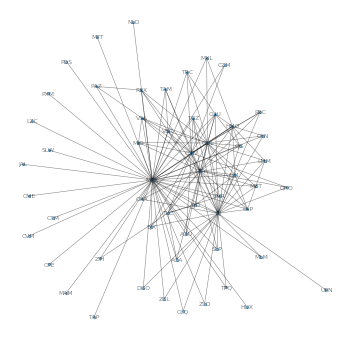

In [0]:
# plot the graph
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

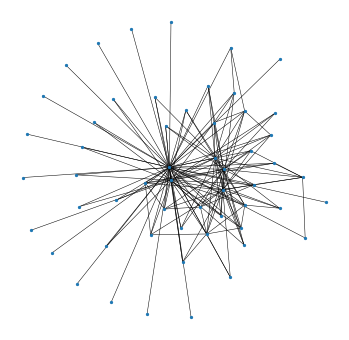

In [0]:
# keep the largest connected component 
# sg = next(nx.connected_component_subgraphs(g))
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
sg = next(connected_component_subgraphs(g))

# and plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

In [0]:
# prepare final graph
# create a dictionary based on IATA codes for airports

# reset index
airports_MX_unique = airports_MX.loc[~airports_MX.index.duplicated(keep='first')]

pos = {airport: (v['lon'], v['lat'])
        for airport, v in
        airports_MX_unique.to_dict('index').items()}

!pip install mplleaflet
import mplleaflet
fig, ax = plt.subplots()

nx.draw_networkx_nodes(sg,pos=pos,node_size=10,node_color='red',edge_color='k',alpha=.5, with_labels=False)
nx.draw_networkx_edges(sg,pos=pos,edge_color='gray', alpha=.1)
nx.draw_networkx_labels(sg,pos, label_pos =10.3)

mplleaflet.display(fig=ax.figure)

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28556 sha256=02ba7e321b565757932f826e4f78bfa1fb17d64e9ceda010c4b067fdf313c074
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet
